# **Predictive Model - Regression (Revenue)**

## Objectives

* Train a regression model to predict movie revenue from engineered features

## Inputs

* Libraries: 
    - pandas
    - numpy
    - warnings
    - from sklearn.model_selection import train_test_split, cross_val_score
    - from sklearn.preprocessing import OneHotEncoder, StandardScaler
    - from sklearn.compose import ColumnTransformer
    - from sklearn.pipeline import Pipeline
    - from sklearn.metrics import mean_squared_error, r2_score
    - from sklearn.linear_model import LinearRegression
    - from sklearn.ensemble import RandomForestRegressor
    - from xgboost import XGBRegressor
    - from sklearn.model_selection import GridSearchCV
* Dataset: 
    - `Data/PROCESSED/movies_ready_for_EDA.csv`

## Outputs

* Tuned XGBoost model (via GridSearchCV) for revenue (best hyperparameters and CV R² printed.)
* Test-set performance printed: R² and RMSE for the tuned original-scale model.
* Visuals displayed: Actual vs Predicted Revenue scatter plot
* Top-10 Feature Importances bar chart.




---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Hamas\\AI\\AI_Projects\\Code_Institute_Projects\\hackathon2_team1\\Team1_TMDb_Hackathon_2\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Hamas\\AI\\AI_Projects\\Code_Institute_Projects\\hackathon2_team1\\Team1_TMDb_Hackathon_2'

---

In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


In [5]:
df = pd.read_csv("Data/PROCESSED/movies_ready_for_EDA.csv")


In [ ]:
features = ['Log_budget', 'Genres', 'Language_full', 
            'Primary_production_country', 'Primary_production_company', 'Runtime']
target = 'Log_revenue'

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")

Training samples: 3842, Test samples: 961


In [7]:
# Preprocessing 
numeric_features = ['Log_budget', 'Runtime']
categorical_features = ['Genres', 'Language_full', 
                        'Primary_production_country', 'Primary_production_company']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [8]:
# Hyperparameter Tuning on log-transformed data

from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

xgb_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=42))
])

param_grid = {
    'model__n_estimators': [200, 300, 400],
    'model__max_depth': [6, 8, 10],
    'model__learning_rate': [0.05, 0.1, 0.2],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    xgb_pipe,
    param_grid,
    cv=5,
    n_jobs=-1,
    scoring='r2',
    verbose=2
)

grid_search.fit(X_train, y_train)

print("\n🔍 Best Parameters Found:")
print(grid_search.best_params_)
print(f"Best CV R²: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits

🔍 Best Parameters Found:
{'model__colsample_bytree': 0.8, 'model__learning_rate': 0.05, 'model__max_depth': 6, 'model__n_estimators': 200, 'model__subsample': 1.0}
Best CV R²: 0.5392


In [9]:

best_model = grid_search.best_estimator_
y_pred_log = best_model.predict(X_test)

#Metrics in log scale
r2_log = r2_score(y_test, y_pred_log)
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_log))

print("\n Log-Scale Evaluation:")
print(f"R² (log): {r2_log:.3f}")
print(f"RMSE (log): {rmse_log:.3f}")

# Convert back to original scale
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred_log)

r2_real = r2_score(y_test_exp, y_pred_exp)
rmse_real = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))

print("\n Original Revenue Scale Evaluation:")
print(f"R²: {r2_real:.3f}")
print(f"RMSE: {rmse_real:,.2f}")



 Log-Scale Evaluation:
R² (log): 0.512
RMSE (log): 5.778

 Original Revenue Scale Evaluation:
R²: 0.396
RMSE: 125,478,252.69


In [10]:
# Prepare features and target variable
features = ['Budget', 'Genres', 'Language_full', 'Primary_production_country',
            'Primary_production_company', 'Runtime']
target = 'Revenue'

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")

Training samples: 3842, Test samples: 961


In [11]:
#Preprocessing Pipeline
numeric_features = ['Budget', 'Runtime']
categorical_features = ['Genres', 'Language_full', 
                        'Primary_production_country', 'Primary_production_company']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [12]:
# Train Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(
        random_state=42, n_estimators=200, max_depth=15
    ),
    "XGBoost": XGBRegressor(
        random_state=42, n_estimators=300, learning_rate=0.1, max_depth=8
    )
}

results = {}

for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results[name] = {'R2': r2, 'RMSE': rmse}
    
    print(f"\n{name} Results:")
    print(f"R²: {r2:.3f}")
    print(f"RMSE: {rmse:.2f}")


Linear Regression Results:
R²: 0.494
RMSE: 114842858.25

Random Forest Results:
R²: 0.618
RMSE: 99742693.90

XGBoost Results:
R²: 0.651
RMSE: 95314356.18


In [13]:
# Model Comparison
results_df = pd.DataFrame(results).T.sort_values(by='R2', ascending=False)
print("\nModel Comparison:")
print(results_df)
#
best_model_name = results_df.index[0]
print(f"\n Best Model: {best_model_name}")


Model Comparison:
                         R2          RMSE
XGBoost            0.651202  9.531436e+07
Random Forest      0.618038  9.974269e+07
Linear Regression  0.493632  1.148429e+08

 Best Model: XGBoost


In [14]:
# Hyperparameter Tuning with GridSearchCV

from sklearn.model_selection import GridSearchCV

xgb_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=42))
])

# Parameter grid
param_grid = {
    'model__n_estimators': [200, 300, 400],
    'model__max_depth': [6, 8, 10],
    'model__learning_rate': [0.05, 0.1, 0.2],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0]
}


In [15]:
# Initialize GridSearchCV
grid_search = GridSearchCV(
    xgb_pipe,
    param_grid,
    cv=5,
    n_jobs=-1,
    scoring='r2',
    verbose=2
)

grid_search.fit(X_train, y_train)

# Best parameters and score
print("\n Best Parameters Found:")
print(grid_search.best_params_)

print(f"\nBest Cross-Validated R²: {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n Test Set Performance (Tuned XGBoost):")
print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits

 Best Parameters Found:
{'model__colsample_bytree': 0.8, 'model__learning_rate': 0.05, 'model__max_depth': 6, 'model__n_estimators': 200, 'model__subsample': 0.8}

Best Cross-Validated R²: 0.5312

 Test Set Performance (Tuned XGBoost):
R²: 0.670
RMSE: 92764917.41


In [32]:
# Hyperparameter Tuning on log-transformed data

from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

xgb_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=42))
])

param_grid = {
    'model__n_estimators': [200, 300, 400],
    'model__max_depth': [6, 8, 10],
    'model__learning_rate': [0.05, 0.1, 0.2],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    xgb_pipe,
    param_grid,
    cv=5,
    n_jobs=-1,
    scoring='r2',
    verbose=2
)

grid_search.fit(X_train, y_train)

print("\n🔍 Best Parameters Found:")
print(grid_search.best_params_)
print(f"Best CV R²: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits

🔍 Best Parameters Found:
{'model__colsample_bytree': 0.8, 'model__learning_rate': 0.05, 'model__max_depth': 6, 'model__n_estimators': 200, 'model__subsample': 1.0}
Best CV R²: 0.5392


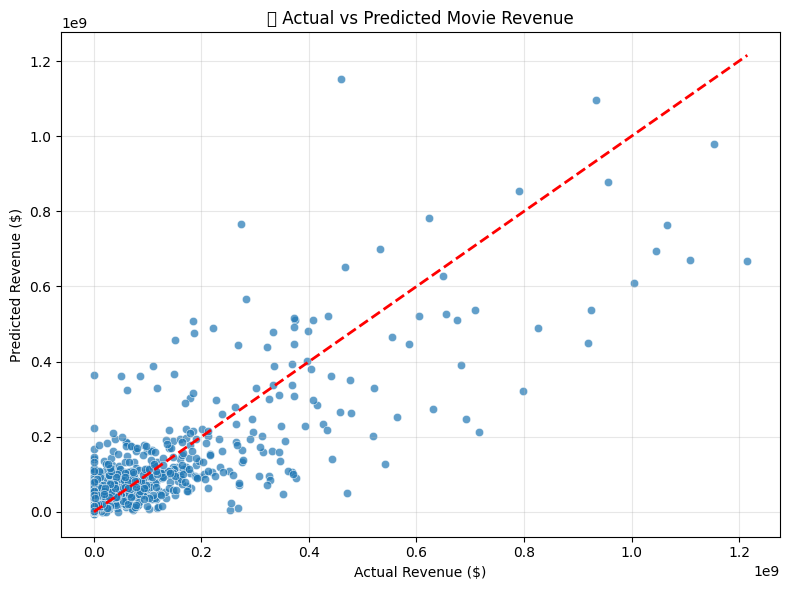

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for plotting
results_df = pd.DataFrame({
    'Actual Revenue': y_test,
    'Predicted Revenue': y_pred
})

plt.figure(figsize=(8,6))
sns.scatterplot(x='Actual Revenue', y='Predicted Revenue', data=results_df, alpha=0.7)
plt.plot([results_df['Actual Revenue'].min(), results_df['Actual Revenue'].max()],
         [results_df['Actual Revenue'].min(), results_df['Actual Revenue'].max()],
         color='red', lw=2, linestyle='--')
plt.title('🎬 Actual vs Predicted Movie Revenue')
plt.xlabel('Actual Revenue ($)')
plt.ylabel('Predicted Revenue ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
preprocessor = best_model.named_steps['preprocessor']

feature_names = preprocessor.get_feature_names_out()

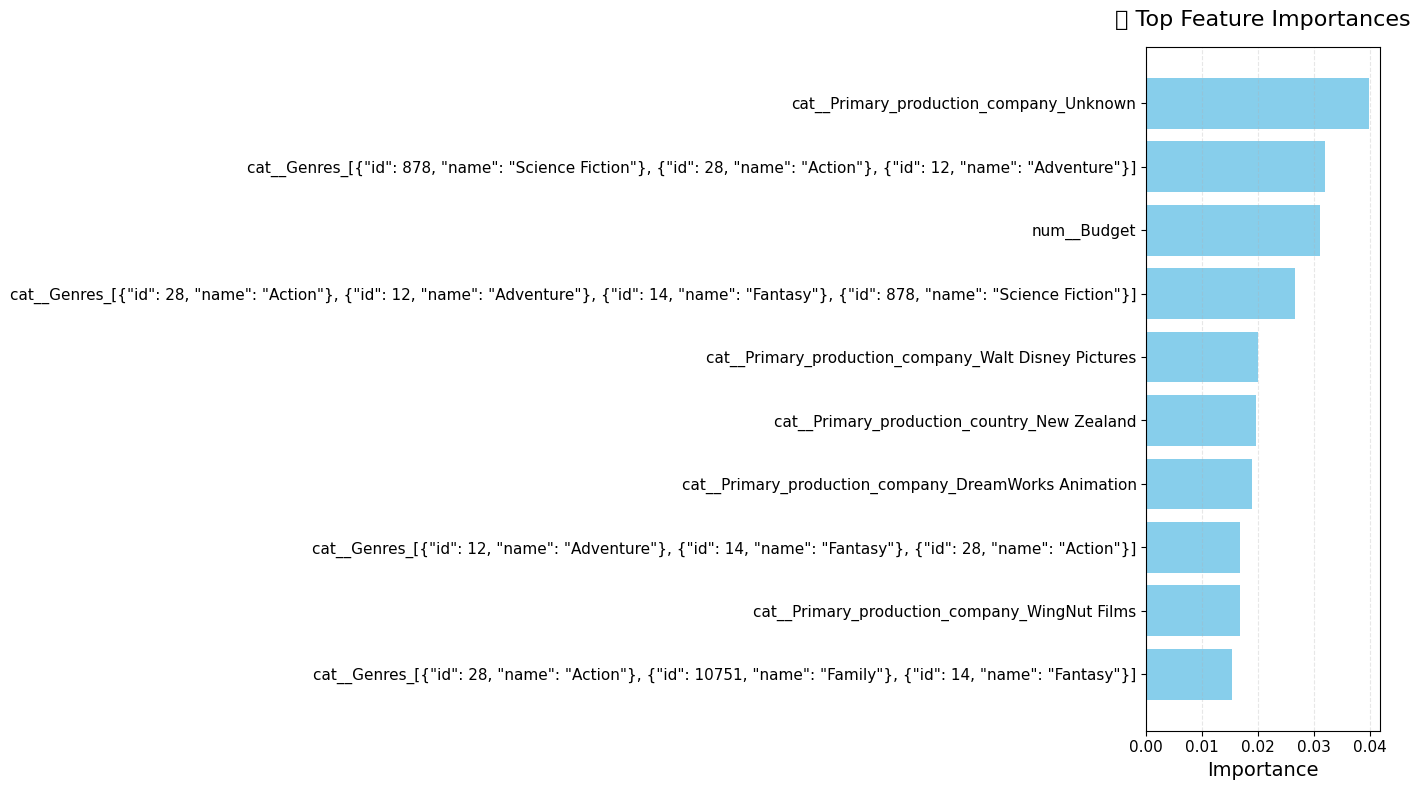

In [54]:
model = best_model.named_steps['model']
importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

top_n = 10  

plt.figure(figsize=(14, top_n * 0.8))  

plt.barh(
    importance_df['Feature'][:top_n][::-1],
    importance_df['Importance'][:top_n][::-1],
    color='skyblue'
)

plt.title('🔥 Top Feature Importances', fontsize=16, pad=15)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('')
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



---

# Summary

* Features: Budget, Genres, Language_full, Primary_production_country, Primary_production_company, Runtime.
* Target: Revenue.
* Preprocessing: StandardScaler for numeric (Log_budget, Runtime) and OneHotEncoder(handle_unknown='ignore') for categoricals.
* Model: XGBoost in a Pipeline with GridSearchCV (5-fold, scoring=R2) over n_estimators, max_depth, learning_rate, subsample, colsample_bytree.
* Test metrics on log scale (R2, RMSE).
* Actual vs Predicted scatter (original-scale) using seaborn/matplotlib.
* Feature importance bar chart (top 10) using the tuned XGBoost.